# Health Insurance Cross Sell Prediction

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

<b>Column Description:</b> <br><br>
id = Unique ID for the customer <br/>
Gender = Gender of the customer<br />
Age = Age of the customer <br />
Driving_License = 0 : Customer does not have DL, 1 : Customer already has DL <br/>
Region_Code = Unique code for the region of the customer<br/>
Previously_Insured = 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance <br />
Vehicle_Age = Age of the Vehicle <br/>
Vehicle_Damage = 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past. <br/>
Annual_Premium = The amount customer needs to pay as premium in the year <br/>
PolicySalesChannel = Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc. <br/>
Vintage	= Number of Days, Customer has been associated with the company <br/>
Response = 1 : Customer is interested, 0 : Customer is not interested<br>

<b>Import packages</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, mean_squared_error, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [3]:
#Reading data
train_data = pd.read_csv('train.csv')

In [4]:
# View train data 
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
# Check if there are any null values or not
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
id                      381109 non-null int64
Gender                  381109 non-null object
Age                     381109 non-null int64
Driving_License         381109 non-null int64
Region_Code             381109 non-null float64
Previously_Insured      381109 non-null int64
Vehicle_Age             381109 non-null object
Vehicle_Damage          381109 non-null object
Annual_Premium          381109 non-null float64
Policy_Sales_Channel    381109 non-null float64
Vintage                 381109 non-null int64
Response                381109 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


Inference: There are 381109 rows and 12 columns. There are no null values in the train dataset

In [6]:
# unique values
for i in train_data.columns:
    print(i,": ",train_data[i].nunique())

id :  381109
Gender :  2
Age :  66
Driving_License :  2
Region_Code :  53
Previously_Insured :  2
Vehicle_Age :  3
Vehicle_Damage :  2
Annual_Premium :  48838
Policy_Sales_Channel :  155
Vintage :  290
Response :  2


# EDA

<b>Age group that has maximum previously purchased vehicle insurance</b>

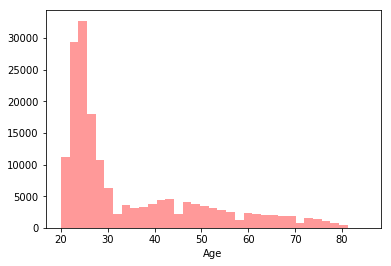

In [7]:
sns.distplot(train_data[train_data['Previously_Insured'] == 1]['Age'], kde = False, bins = 35, color = 'red')

<b>Inference: </b>Age group 22-26 has maximum amount of previous purchased vehicle insurance

<b>Age of vehicle where it is damaged maximum and least</b>


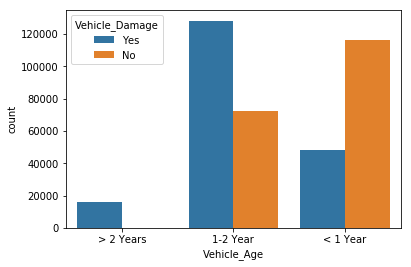

In [8]:
sns.countplot(x = 'Vehicle_Age', data = train_data, hue = "Vehicle_Damage")

<b>Inference:</b> More than 1.2 Lakh of vehicle are damaged in 1-2 years (Maximum) and around 18,000 vehicles are damaged when age is more than 2 years (Least). <br />
Around 1.1 Lakh of vehicles are not damaged when the age of vehicle is less than 1 year.

<b>Customer age group with most vehicle damage</b>

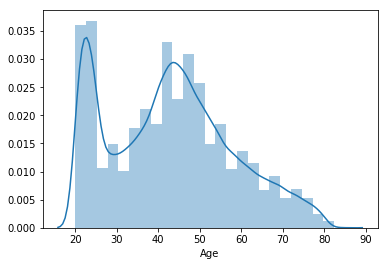

In [9]:
sns.distplot(train_data[train_data['Vehicle_Damage'] == 'Yes']['Age'], bins = 25)

<b>Inference:</b> Age group 20-25 and 45-48 have most damaged vehicles

<b>Previously insured customers having vehicles of different age interested in buying new insurance or not</b>

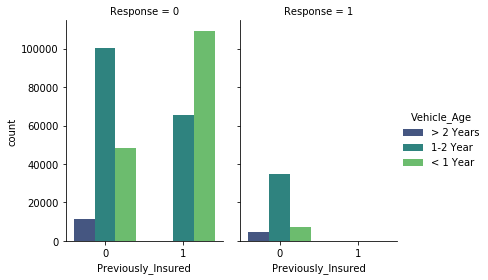

In [10]:
sns.catplot(x = "Previously_Insured", hue = "Vehicle_Age", col = "Response", data = train_data, kind = "count", 
            height = 4, aspect = .7, palette = 'viridis');

Inference: There are more number of customers with 'NO' as response even if they have bought insurance before.

<b>Customers of damaged vehicle that are previously insured would buy new insurance or not</b>

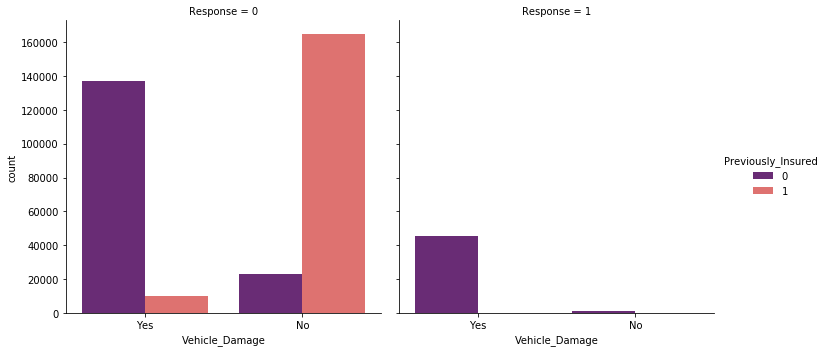

In [11]:
sns.catplot(x = 'Vehicle_Damage', col = 'Response', data = train_data, kind = 'count', hue = 'Previously_Insured', palette = 'magma')

In [12]:
veh = train_data[train_data['Previously_Insured'] == 1][['Vehicle_Damage', 'Response']]
res = veh[veh['Vehicle_Damage'] == 'Yes']
res[res['Response'] == 1].shape

(86, 2)

Inference: There are around 1.4 lakh customers that have damaged vehicle and have not bought insurance before and their response as 'NO'

<b>Number of positive and negative responses</b>

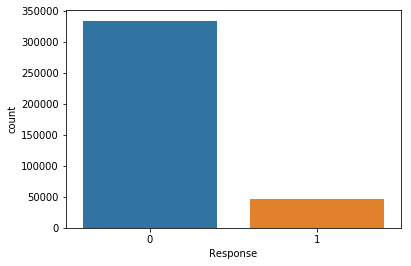

In [13]:
sns.countplot(x = 'Response', data = train_data)

In [14]:
# Check if the data is balanced or not
train_data['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

**Inference**: From the above value counts of the column 'Response' it seems that the data is not balanced as 85% of responses are 0 which make it difficult for training model

In [15]:
#dropping id column from dataset
train_data.drop(['id'], axis = 1, inplace = True)

# Balancing data

In [16]:
train_data = shuffle(train_data, random_state = 10)

In [17]:
train_data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
80516,Male,78,1,50.0,0,1-2 Year,Yes,35661.0,155.0,244,0
296329,Female,26,1,28.0,0,< 1 Year,Yes,50118.0,26.0,255,1
300975,Female,20,1,10.0,1,< 1 Year,No,30163.0,160.0,186,0
316528,Female,23,1,11.0,1,< 1 Year,No,38148.0,152.0,244,0
48123,Female,24,1,6.0,1,< 1 Year,No,24471.0,152.0,66,0


In [18]:
grouped = train_data.groupby('Response')

In [19]:
# count of minimum responses
min_count = min(train_data['Response'].value_counts())

In [20]:
zero_response = grouped.get_group(0)

In [21]:
one_response = grouped.get_group(1)

In [22]:
df_final = pd.concat([zero_response.head(min_count), one_response.head(min_count)], sort = False)

In [23]:
df_final = shuffle(df_final, random_state = 10)

In [24]:
df_final.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
18492,Male,26,1,15.0,1,< 1 Year,No,31587.0,152.0,74,0
308746,Female,55,1,28.0,0,1-2 Year,Yes,28235.0,26.0,53,1
103418,Female,55,1,20.0,0,1-2 Year,Yes,2630.0,26.0,287,0
81610,Male,44,1,35.0,0,1-2 Year,Yes,36530.0,124.0,176,1
256375,Female,25,1,29.0,1,< 1 Year,No,28658.0,152.0,166,0


In [25]:
df_final.shape

(93420, 11)

In [26]:
# Label Encoder
le = LabelEncoder()

In [27]:
def convert(df):
    df['Gender'] = le.fit_transform(df['Gender'])
    df['Vehicle_Age'] = le.fit_transform(df['Vehicle_Age'])
    df['Vehicle_Damage'] = le.fit_transform(df['Vehicle_Damage'])

In [28]:
convert(df_final)

In [29]:
df_final.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
18492,1,26,1,15.0,1,1,0,31587.0,152.0,74,0
308746,0,55,1,28.0,0,0,1,28235.0,26.0,53,1
103418,0,55,1,20.0,0,0,1,2630.0,26.0,287,0
81610,1,44,1,35.0,0,0,1,36530.0,124.0,176,1
256375,0,25,1,29.0,1,1,0,28658.0,152.0,166,0


# Model

In [30]:
X = df_final.drop(['Response'], axis = 1)
y = df_final['Response']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

**Linear Regression**

In [32]:
linear = LinearRegression()
linear.fit(X_train, y_train)
pred_linear = linear.predict(X_test)
pred_linear = np.around(pred_linear).astype('int')


**Logistic Regression**

In [33]:
logistic = LogisticRegression(max_iter=10000)
logistic.fit(X_train, y_train)
pred_logistic = logistic.predict(X_test)

C:\Users\Wagle\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**SVM**

In [34]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svm = svc.predict(X_test)

C:\Users\Wagle\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


**Lasso**

In [35]:
lasso = Lasso()
lasso.fit(X_train, y_train)
pred_lasso = lasso.predict(X_test)
pred_lasso = np.around(pred_lasso).astype('int')

**Ridge**

In [36]:
ridge = Ridge()
ridge.fit(X_train, y_train)
pred_ridge = ridge.predict(X_test)
pred_ridge = np.around(pred_ridge).astype('int')

**Decision Tree**

In [37]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred_dt_clf = dt_clf.predict(X_test)

**Bagging**

In [38]:
b_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100, max_samples = 100, random_state = 0)
b_clf.fit(X_train, y_train)
pred_b_clf = b_clf.predict(X_test)

**Random Forest**

In [39]:
rf_clf = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 100, n_jobs = 100, random_state = 0)
rf_clf.fit(X_train, y_train)
pred_rf_clf = rf_clf.predict(X_test)


# **Scores**

In [40]:
model_list = ['Linear Regression', 'Logistic Regression', 'SVM', 'Lasso', 'Ridge', 'Decision Tree', 'Bagging', 'Random Forest']
prediction_list = [pred_linear, pred_logistic, pred_svm, pred_lasso, pred_ridge, pred_dt_clf, pred_b_clf, pred_rf_clf]

In [41]:
dc = dict()
for pred, model in zip(prediction_list, model_list):
  precision, recall, f1, _ = precision_recall_fscore_support(y_test, pred, average='macro')
  dc[model] = {'Accuracy':np.around(accuracy_score(y_test, pred), decimals = 3), 
               'Precision': np.around(precision, decimals = 3), 
               'Recall': np.around(recall, decimals = 3), 
               'F1- score': np.around(f1, decimals = 3), 
               'ROC AUC Score': np.around(roc_auc_score(y_test, pred), decimals = 3),
               'RMSE': np.around(np.sqrt(mean_squared_error(y_test, pred)), decimals = 3)
               }

In [42]:
pd.DataFrame(dc)

,Linear Regression,Logistic Regression,SVM,Lasso,Ridge,Decision Tree,Bagging,Random Forest
Accuracy,0.783,0.782,0.520,0.580,0.783,0.715,0.789,0.796
F1- score,0.774,0.774,0.424,0.566,0.774,0.715,0.785,0.792
Precision,0.833,0.834,0.554,0.590,0.833,0.715,0.816,0.822
RMSE,0.466,0.467,0.693,0.648,0.466,0.534,0.459,0.452
ROC AUC Score,0.783,0.783,0.518,0.579,0.783,0.715,0.790,0.796
Recall,0.783,0.783,0.518,0.579,0.783,0.715,0.790,0.796


<b>Inference : Random forest gives highest accuracy and least error of all models. It would be efficient to use Random forest algorithm.</b>
